## Big Mart Sales Prediction


### The Problem Statement:

This data is from Big Mart across its 1559 products sold at its chain of 10 stores, The data is about the range of items present in store their visibility and sales figures, There also some data present about the stores like thier establishment year,location and store size. Our target is to  make a prediction model for sales of each item at particular stores , which may help understand the product sale at different outlets and overall increase the sales figures for the store in overall.



## Work Flow:

1. Hypothesis Generation: Try to understand and explain factors which contribute to more sales , Think about all possible scenarios which may help to generate or incrrease sales.

2. Data Exploration: Exlopre the present data to gain insights about the sales target looking at categorical and numerical data and make inferences about the target.

3. Data Cleaning: Perform data cleaning steps which may include removing duplicate , imputing missing values, and check for outliers

4. Feature Engineering: Select Features which explain the target well and modify or combine data to get better model prediction

5. Model Building: Build your model based on insights from the data explored in previous steps, Idea is set up a baseline model and then build upon other models to have better accuracy with our prediction results.

## Hypothesis Generation:

What are the factors which could affect the sales?


Store Level Factors:
1. Location of the Store 
2. Ambience of the Store
3. Parking Availability 
4. Staff Courtesy
5. Store Timings 
6. ATM Inside/Nearby
7. Home Delivery Option
8. Population
9. Competitiors 
10. Marketing and Promotions
11. Store Size


Product Level Factors:
1. Product Quality 
2. Avaialibility 
3. Packaging 
4. Brand of the Product
5. Product Range
6. Promotions 
7. Visibility in Store 
8. Utility of the product (Daily Use and Food Products tends to sell more.)
9. Price 


## Data Exploration

In [64]:
# Package Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read the Data 

data = pd.read_csv('Data.csv')

In [3]:
# Overview of your data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data['Item_Identifier'].nunique()

1559

In [5]:
data['Outlet_Identifier'].nunique()

10

In [6]:
list(data.columns)


['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

## Hypothesis and Data Inferences:

We See we have below attributes present in our data and let see how they fit into our Hypothesis..

| Data Features             | Hypothesis                          |
|---------------------------|-------------------------------------|
| Item_Identifier           |  Not present in our Hypothesis      |
| Item_Weight               | Not present in our Hypothesis       |
| Item_Fat_Content          | Present in Hypothesis as Utility    |
| Item_Visibility           | Present in Hypothesis as Visibility |
| Item_Type                 | Present in Hypothesis as Range      |
| Item_MRP                  | Present in Hypothesis as Price      |
| Outlet_Identifier         | Not Present in Hypothesis           |
| Outlet_Establishment_Year | Not Present in Hypothesis           |
| Outlet_Size               | Present in Hypothesis as Size       |
| Outlet_Location_Type      | Present in Hypothesis as Location   |
| Outlet_Type               | Present in Hypothesis as Size       |
| Item_Outlet_Sales         | Target Variable                     |

So out of Total 20 factors considered in out hypothesis our data contains 7 Factors which could explain or influence out target variable 4 factors not considered in hypothesis but present in our data 

In [7]:
# So lets start our EDA and look at some basis stats from numerical data 

data.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Observations:

Item_Visibilily has min value zero which makes no sense as the product is not visible and will not generate sales
Item_Weights and Outlet Size counts are less which indicate missing values will check in next step
Outlet Establishment years vary from 1985 to 2009 may be we can convert these to store age which impact sales better as older stores are usually trusted more


In [8]:
# Check for Missing Values

data.isnull().any()

# This proves that we have missing values in Item_Weights and Outlet_Size we need to impute missing values which will be handled later

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [9]:

data.corr()


# Here we can see that MRP and Item_Outlet sales have a good correlation
# Also Establishment Year and Sales showed a negative correlation which is in real world is quite opposite old and trusted 
# stores tend to make better sales will have to check on this may be converting to store age in years may help better


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
# lets look into categorical data 

# lets find out the counts of unique data values in our data set


non_numerical_features = data.select_dtypes(include=[np.object])
non_numerical_features.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

### Observations
Item_Fat_Content have 5 different types 
Item_Type has 16 Unique values
Item Identifier and Outlet Identifier matched our problem statement of 1559 products across 10 stores

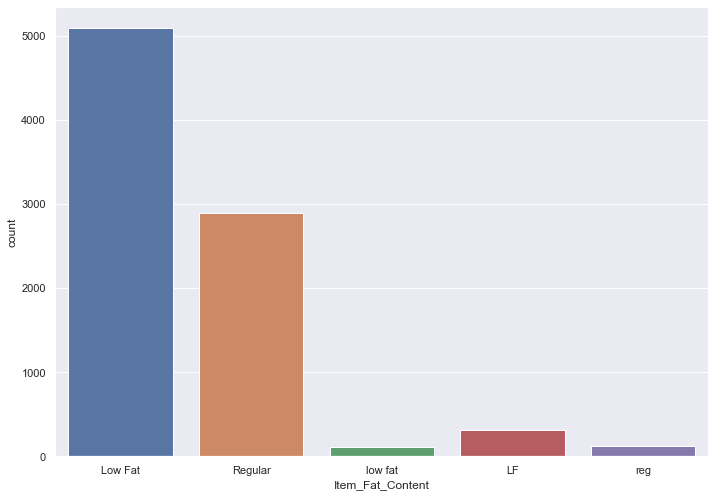

In [11]:
# Let us check the frequencies of unique values in out categorical data
cols = list(non_numerical_features.columns)
plot = cols[1:3]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = non_numerical_features['Item_Fat_Content'],data = non_numerical_features)


[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

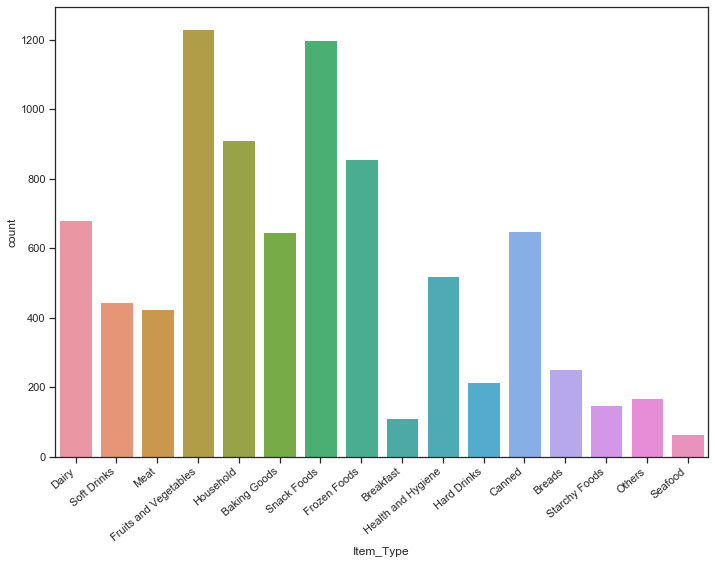

In [12]:
sns.set(style="ticks")
ax = sns.countplot(x = non_numerical_features['Item_Type'],data = non_numerical_features)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### Overall Observations:

1.Item_Visibilily has min value zero which makes no sense as the product is not visible and will not generate sales  

2.Item_Weights and Outlet Size counts are less which indicate missing values  

3.Item_Fat_Content is wrongly spelled as LF,reg and low fat which need to be fixed.  

4.Item Type has 16 different values they can be combined to have a new feature as consumable or non consumable.  

5.Outlet Establishment years vary from 1985 to 2009 may be we can convert these to store age as older stores are trusted and have more sales

## Data Cleanup

In [13]:
# Impute missing values for Item_Weights and Outlet_Size

#Count Missing values
missing_weights = data['Item_Weight'].isnull().sum()
print(f'#There are {missing_weights} entries missing in Item_Weight')

Item_Weight_Mean = data['Item_Weight'].mean()


#There are 1463 entries missing in Item_Weight


In [14]:
original = data.copy()

data['Item_Weight'].fillna(Item_Weight_Mean,inplace=True)
print(f'Missing Values in Item_Weight Before Imputation: ',original['Item_Weight'].isna().sum())
print(f'Missing Values in Item_Weight After Imputation: ',data['Item_Weight'].isna().sum())

Missing Values in Item_Weight Before Imputation:  1463
Missing Values in Item_Weight After Imputation:  0


In [15]:
# For  Imputing Outlet_Size lets check the Mode

data['Outlet_Size'].value_counts()

outlet_size_mode = data['Outlet_Size'].value_counts().index[0]

print(f'The mode of the Outlet Size is:',outlet_size_mode)

The mode of the Outlet Size is: Medium


In [16]:

data['Outlet_Size'].fillna(outlet_size_mode,inplace=True)
print(f'Missing Values in Outlet_Size After Imputation: ',original['Outlet_Size'].isna().sum())
print(f'Missing Values in Outlet_Size After Imputation: ',data['Outlet_Size'].isna().sum())

Missing Values in Outlet_Size After Imputation:  2410
Missing Values in Outlet_Size After Imputation:  0


## Feature Engineering:

In [40]:
# Now we have some clean data avaialble let work on the features and make the data ready for the Model building.

# From our EDA we found thet Item_Visbility has zero min 

print(f'Minimum Visibility Value',original['Item_Visibility'].min())

# A zero visibility for the product means no sales generation so lets change this to mean visibility
it_vis_mean = original['Item_Visibility'].mean()



data['Item_Visibility'] = data['Item_Visibility'].map(lambda x:it_vis_mean if x==0 else x)
print(f'Minimum Visibility Value after replacing zero values as mean',data['Item_Visibility'].min())

Minimum Visibility Value 0.0
Minimum Visibility Value after replacing zero values as mean 0.003574698


In [46]:
# Fix Item_Fat_Content Values

print(original['Item_Fat_Content'].value_counts())


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [49]:
# Fix Item_Types as per EDA we have 16 unique values which wee need to reduce

# As per the Item Identifer we see all the IDs start with FD DR or NC which indicated FOOD, DRINK AND NON-CONSUMABLES 

#lets use these to seperate items into three broad categories


data['Item_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Combined'] = data['Item_Combined'].map({'FD':'Edible Food','DR':'Edible Drink','NC':'Non Consumable'})

data['Item_Combined'].value_counts()

Edible Food       6125
Non Consumable    1599
Edible Drink       799
Name: Item_Combined, dtype: int64

In [62]:
#Converting establishment year to number oy years of operation 

data["Operational_Years"] = 2013 - data["Outlet_Establishment_Year"]

data['Operational_Years'].head()

# We need to normalize this Operational years for a predeiction model as again the range of values are varying 
x = data[['Operational_Years']].values.astype(float)

min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

data['Operational_Years_Norm'] = pd.DataFrame(x_scaled)

In [66]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Combined,Operational_Years,Operational_Years_Norm
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Edible Food,14,0.416667
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Edible Drink,4,0.000000
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Edible Food,14,0.416667
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Edible Food,15,0.458333
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable,26,0.916667


In [71]:
# Also observed that for some Non-Consumable Items we have Fat_Content values this also need to be separated
data.loc[data['Item_Combined']=='Non Consumable','Item_Fat_Content'] ='Non Edible'

data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [72]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Combined,Operational_Years,Operational_Years_Norm
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Edible Food,14,0.416667
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Edible Drink,4,0.000000
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Edible Food,14,0.416667
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Edible Food,15,0.458333
4,NCD19,8.93,Non Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable,26,0.916667


In [77]:
# Since sklearn uses numerical values for processing its a good idea to encode all our categorical data into numbers
# Will use sklearn preprocessing module and perform label encoding 

label_en = LabelEncoder()

#New variable for outlet
data['Outlet'] = label_en.fit_transform(data['Outlet_Identifier'])

modified_vars = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in modified_vars:
    data[i] = le.fit_transform(data[i])
    
    
# Also perform One Hot Encoding to generate dummy data for each categorical variable this will change each category into 1 and 0

#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Combined','Outlet'])

In [78]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Operational_Years,Operational_Years_Norm,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,0.416667,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,0.416667,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0.458333,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,994.7052,26,0.916667,...,0,1,0,0,0,0,0,0,0,0


In [80]:
# Now lets drop unwanted columns for which we prepared combined columns 

data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

## Our Data is now ready for split and model Building...